In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [43]:
data = np.array([[0,1,1,2,1], [1,0,1,1,2], [0.05,2.05,1.05,1.95,-0.05]])
df = pd.DataFrame({'X1': data[0], 'X2': data[1], 'Y': data[2]})
df

,X1,X2,Y
0,0.0,1.0,0.05
1,1.0,0.0,2.05
2,1.0,1.0,1.05
3,2.0,1.0,1.95
4,1.0,2.0,-0.05


In [44]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('Y',axis='columns'),df.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg.coef_

array([ 0.95, -1.05])

In [46]:
reg.intercept_

1.1099999999999999

In [47]:
from mpl_toolkits.mplot3d import Axes3D

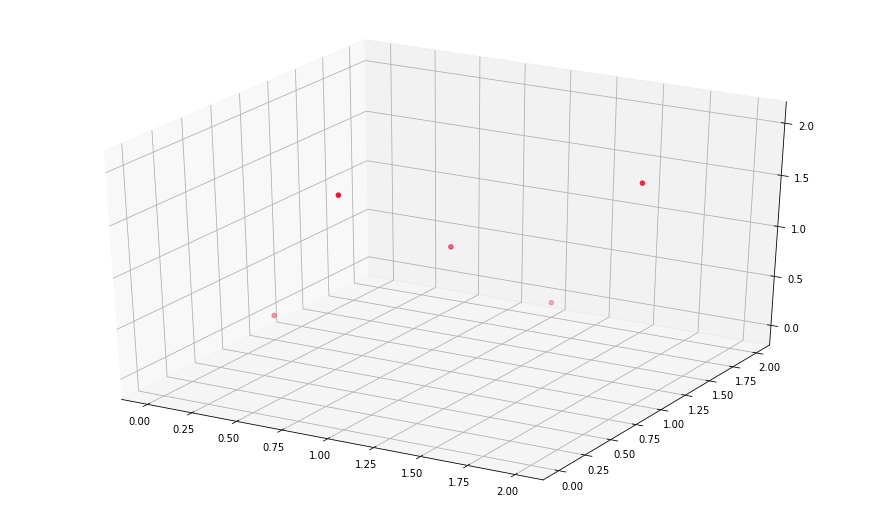

In [48]:
# Ploting the scores as scatter plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 7.0)
x1_val = df['X1'].values
x2_val = df['X2'].values
y_val = df['Y'].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1_val, x2_val, y_val, color='#ef1234')
plt.show()

In [49]:
m = len(x1_val)
x0 = np.ones(m)
X = np.array([x0, x1_val, x2_val]).T
# Initial Coefficients
B = np.array([0, 1, 1])
Y = np.array(y_val)
alpha = 0.001

In [50]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [51]:
initial_cost = cost_function(X, Y, B)
print(initial_cost)

1.3312499999999998


In [52]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [53]:
# In First iteration, Printing theta and cost function
newB, cost_history = gradient_descent(X, Y, B, alpha, 1)

# Values of newB
print('theta(1)= ',newB)

# Cost of newB
print(cost_history[-1])

theta(1)=  [-9.9000e-04  9.9899e-01  9.9819e-01]
1.32598181729


In [54]:
# In Second iteration, Printing theta and cost function
newB, cost_history = gradient_descent(X, Y, B, alpha, 2)

# Values of newB
print('theta(2)= ',newB)

# Cost of newB
print(cost_history[-1])

theta(2)=  [-0.00197619  0.99798421  0.99638453]
1.3207459981644107


In [55]:
# In 1000 th iteration, Printing theta and cost function
newB, cost_history = gradient_descent(X, Y, B, alpha, 1000)

# Values of newB
print('theta(1000)= ',newB)

# Cost of newB
print(cost_history[-1])

theta(1000)=  [-0.17475158  0.86482581  0.20535863]
0.3233987998582737


In [56]:
# In 10000 th iteration, Printing theta and cost function
newB, cost_history = gradient_descent(X, Y, B, alpha, 10000)

# Values of newB
print('theta(10000)= ',newB)

# Cost of newB
print(cost_history[-1])

theta(10000)=  [ 0.67715926  1.12171034 -0.84168769]
0.016170567565022005
